## EDA_Code

**Understanding the data**

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Load the dataset
df = pd.read_csv('whas500.csv')

# Display the first few rows
df.head()

,id,age,gender,hr,sysbp,diasbp,bmi,cvd,afb,sho,...,miord,mitype,year,admitdate,disdate,fdate,los,dstat,lenfol,fstat
0,1,83,0,89,152,78,25.54051,1,1,0,...,1,0,1,1/13/1997,1/18/1997,12/31/2002,5,0,2178,0
1,2,49,0,84,120,60,24.02398,1,0,0,...,0,1,1,1/19/1997,1/24/1997,12/31/2002,5,0,2172,0
2,3,70,1,83,147,88,22.14290,0,0,0,...,0,1,1,1/1/1997,1/6/1997,12/31/2002,5,0,2190,0
3,4,70,0,65,123,76,26.63187,1,0,0,...,0,1,1,2/17/1997,2/27/1997,12/11/1997,10,0,297,1
4,5,70,0,63,135,85,24.41255,1,0,0,...,0,1,1,3/1/1997,3/7/1997,12/31/2002,6,0,2131,0


In [21]:
# Get a concise summary of the DataFrame
df.info()

# Get descriptive statistics for numerical columns
df.describe()

# Check for the first few rows
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         500 non-null    int64  
 1   age        500 non-null    int64  
 2   gender     500 non-null    int64  
 3   hr         500 non-null    int64  
 4   sysbp      500 non-null    int64  
 5   diasbp     500 non-null    int64  
 6   bmi        500 non-null    float64
 7   cvd        500 non-null    int64  
 8   afb        500 non-null    int64  
 9   sho        500 non-null    int64  
 10  chf        500 non-null    int64  
 11  av3        500 non-null    int64  
 12  miord      500 non-null    int64  
 13  mitype     500 non-null    int64  
 14  year       500 non-null    int64  
 15  admitdate  500 non-null    object 
 16  disdate    500 non-null    object 
 17  fdate      500 non-null    object 
 18  los        500 non-null    int64  
 19  dstat      500 non-null    int64  
 20  lenfol    

,id,age,gender,hr,sysbp,diasbp,bmi,cvd,afb,sho,...,miord,mitype,year,admitdate,disdate,fdate,los,dstat,lenfol,fstat
0,1,83,0,89,152,78,25.54051,1,1,0,...,1,0,1,1/13/1997,1/18/1997,12/31/2002,5,0,2178,0
1,2,49,0,84,120,60,24.02398,1,0,0,...,0,1,1,1/19/1997,1/24/1997,12/31/2002,5,0,2172,0
2,3,70,1,83,147,88,22.14290,0,0,0,...,0,1,1,1/1/1997,1/6/1997,12/31/2002,5,0,2190,0
3,4,70,0,65,123,76,26.63187,1,0,0,...,0,1,1,2/17/1997,2/27/1997,12/11/1997,10,0,297,1
4,5,70,0,63,135,85,24.41255,1,0,0,...,0,1,1,3/1/1997,3/7/1997,12/31/2002,6,0,2131,0


In [22]:
# List all column names
df.columns

Index(['id', 'age', 'gender', 'hr', 'sysbp', 'diasbp', 'bmi', 'cvd', 'afb',
       'sho', 'chf', 'av3', 'miord', 'mitype', 'year', 'admitdate', 'disdate',
       'fdate', 'los', 'dstat', 'lenfol', 'fstat'],
      dtype='object')

**Data Cleaning**

In [23]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

id           0
age          0
gender       0
hr           0
sysbp        0
diasbp       0
bmi          0
cvd          0
afb          0
sho          0
chf          0
av3          0
miord        0
mitype       0
year         0
admitdate    0
disdate      0
fdate        0
los          0
dstat        0
lenfol       0
fstat        0
dtype: int64


In [24]:
# Find and remove duplicate rows
df_no_duplicates = df_cleaned.drop_duplicates()

**Data Analysis and visualization**

Health Condition Analysis to explore associations and insights related to various health conditions present in the dataset

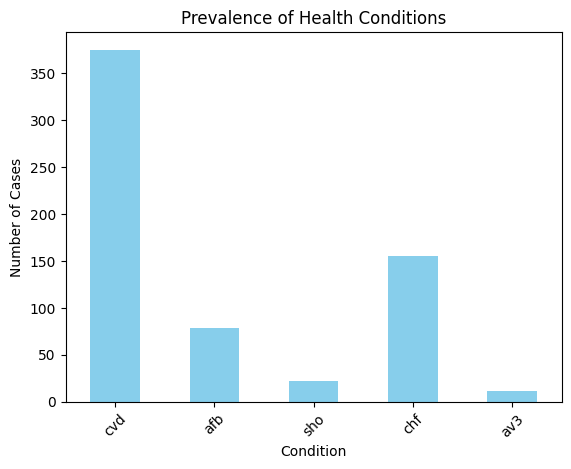

In [25]:
# List of health condition columns
conditions = ['cvd', 'afb', 'sho', 'chf', 'av3']

# Calculate the prevalence of each condition
condition_counts = df[conditions].sum()

# Plot the prevalence
condition_counts.plot(kind='bar', color='skyblue')
plt.title('Prevalence of Health Conditions')
plt.xlabel('Condition')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

Investigate if certain conditions frequently co-occur.

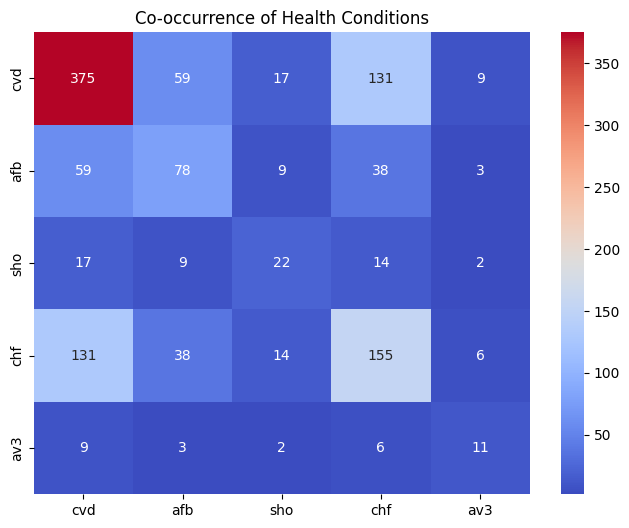

In [26]:
# Calculate co-occurrence matrix
co_occurrence = df[conditions].T.dot(df[conditions])

# Plot the co-occurrence heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(co_occurrence, annot=True, fmt="d", cmap='coolwarm')
plt.title('Co-occurrence of Health Conditions')
plt.show()

Given the high prevalence of cardiovascular disease (CVD) in the dataset, as indicated by the heatmap, lets further investigate and document the findings

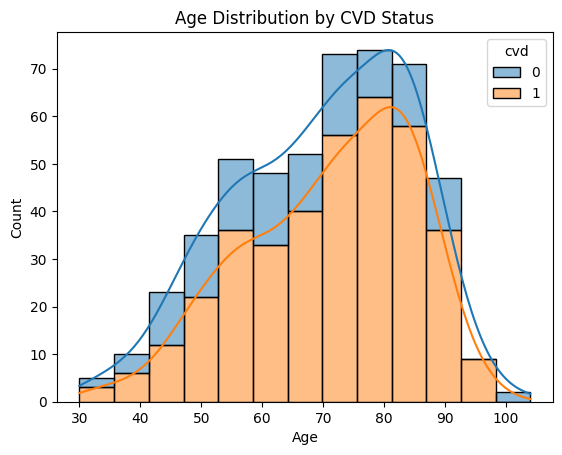

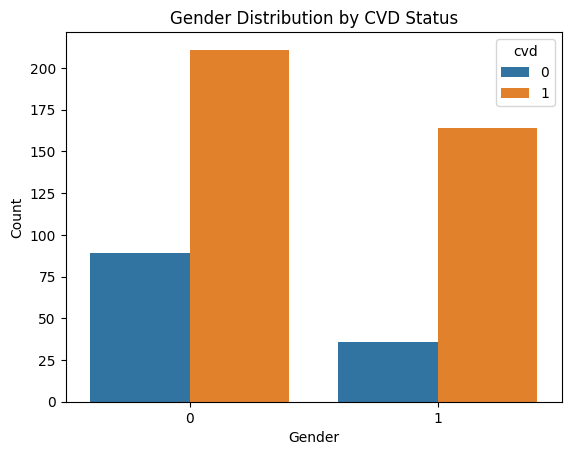

In [27]:
# Age distribution for individuals with and without CVD
sns.histplot(data=df, x='age', hue='cvd', multiple='stack', kde=True)
plt.title('Age Distribution by CVD Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender distribution for individuals with and without CVD
sns.countplot(x='gender', hue='cvd', data=df)
plt.title('Gender Distribution by CVD Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

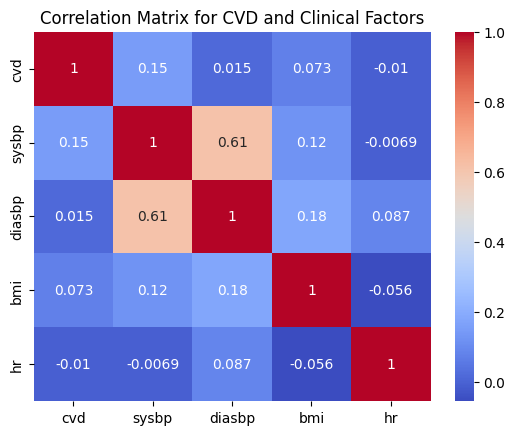

In [28]:
# Correlation analysis for clinical factors
clinical_factors = df[['cvd', 'sysbp', 'diasbp', 'bmi', 'hr']]
correlation_matrix = clinical_factors.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for CVD and Clinical Factors')
plt.show()

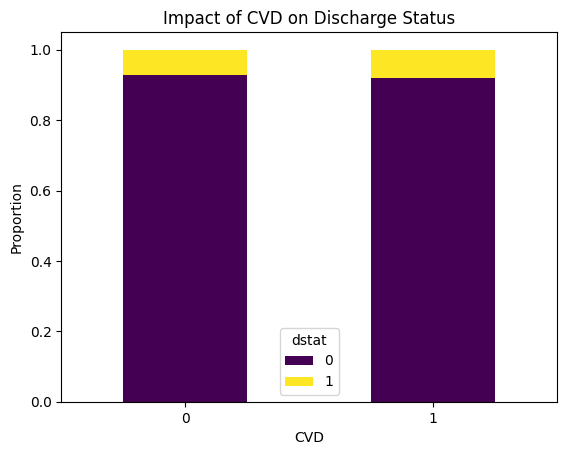

In [29]:
# Impact of CVD on discharge status
cvd_dstat = pd.crosstab(df['cvd'], df['dstat'], normalize='index')
cvd_dstat.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Impact of CVD on Discharge Status')
plt.xlabel('CVD')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.show()